# Libraries

In [1]:
require("IRdisplay")
require("ggplot2")
require("GGally")
require("repr")
require("reshape2")
require("dplyr")
require("lsr")
require("MASS")
require("ggfortify")
require("car")

Loading required package: IRdisplay
Loading required package: ggplot2
Loading required package: GGally
Loading required package: repr
Loading required package: reshape2
Loading required package: dplyr

Attaching package: ‘dplyr’

The following object is masked from ‘package:GGally’:

    nasa

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: lsr
Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Loading required package: ggfortify
Loading required package: car

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode



# Chapter 1. Introduction

No exercises in this chapter.

# Chapter 2. Statistical Learning

## Applied Exercises

### Exercise 8: The College data set 

The college data set contains demographic characteristics, tuition, and more for USA colleges. The data set, which can be found in the file `College.csv`, contains a number of variables for 777 different universities and colleges in the US.

**Variable** | **Description**
:- | :-
**Private** | Public/private indicator
**Apps** | Number of applications received
**Accept** | Number of applicants accepted
**Enroll** | Number of new students enrolled
**Top10perc** | New students from top 10 % of high school class
**Top25perc** | New students from top 25 % of high school class
**F.Undergrad** | Number of full-time undergraduates
**P.Undergrad** | Number of part-time undergraduates
**Outstate** | Out-of-state tuition
**Room.Board** | Room and board costs
**Books** | Estimated book costs
**Personal** | Estimated personal spending
**PhD** | Percent of faculty with Ph.D.’s
**Terminal** | Percent of faculty with terminal degree
**S.F.Ratio** | Student/faculty ratio
**perc.alumni** | Percent of alumni who donate
**Expend** | Instructional expenditure per student
**Grad.Rate** | Graduation rate

In [2]:
college <- read.csv("data/College.csv")
rownames(college) <- college[, 1]
college <- college[, -1]
head(college)

Private Apps Accept Enroll Top10perc Top25perc F.Undergrad P.Undergrad Outstate Room.Board Books Personal PhD Terminal S.F.Ratio perc.alumni Expend Grad.Rate
Abilene Christian University Yes     1660 1232   721    23        52        2885         537         7440    3300       450   2200     70  78       18.1      12           7041  60       
Adelphi University           Yes     2186 1924   512    16        29        2683        1227        12280    6450       750   1500     29  30       12.2      16          10527  56       
Adrian College               Yes     1428 1097   336    22        50        1036          99        11250    3750       400   1165     53  66       12.9      30           8735  54       
Agnes Scott College          Yes      417  349   137    60        89         510          63        12960    5450       450    875     92  97        7.7      37          19016  59       
Alaska Pacific University    Yes      193  146    55    16        44         249         869         7560    4120       800   1500     76  72       11.9       2          10922  15       
Albertson College            Yes      587  479   158    38        62         678          41        13500    3335       500    675     67  73        9.4      11           9727  55

i. Use the `summary()` function to produce a numerical summary of the variables in the data set.

**Note:** to fit better in this notebook, I will print summary by groups of columns.

In [3]:
for (i in list(1:6, 7:12, 13:18)) print(summary(college[, i]))

 Private        Apps           Accept          Enroll       Top10perc       Top25perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00   Min.   :  9.0  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00   1st Qu.: 41.0  
           Median : 1558   Median : 1110   Median : 434   Median :23.00   Median : 54.0  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56   Mean   : 55.8  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00   3rd Qu.: 69.0  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00   Max.   :100.0  
  F.Undergrad     P.Undergrad         Outstate       Room.Board       Books           Personal   
 Min.   :  139   Min.   :    1.0   Min.   : 2340   Min.   :1780   Min.   :  96.0   Min.   : 250  
 1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320   1st Qu.:3597   1st Qu.: 470.0   1st Qu.: 850  
 Median : 1707   Median :  353.0   Median : 9990   Median :4200   Median : 5

There’s way more private universities than public universities.

ii. Use the `pairs()`  function to produce a scatterplot matrix of the first ten columns or variables of the data.

**Note:** Whenever possible, I will use a package that I think it will be prettier or better.

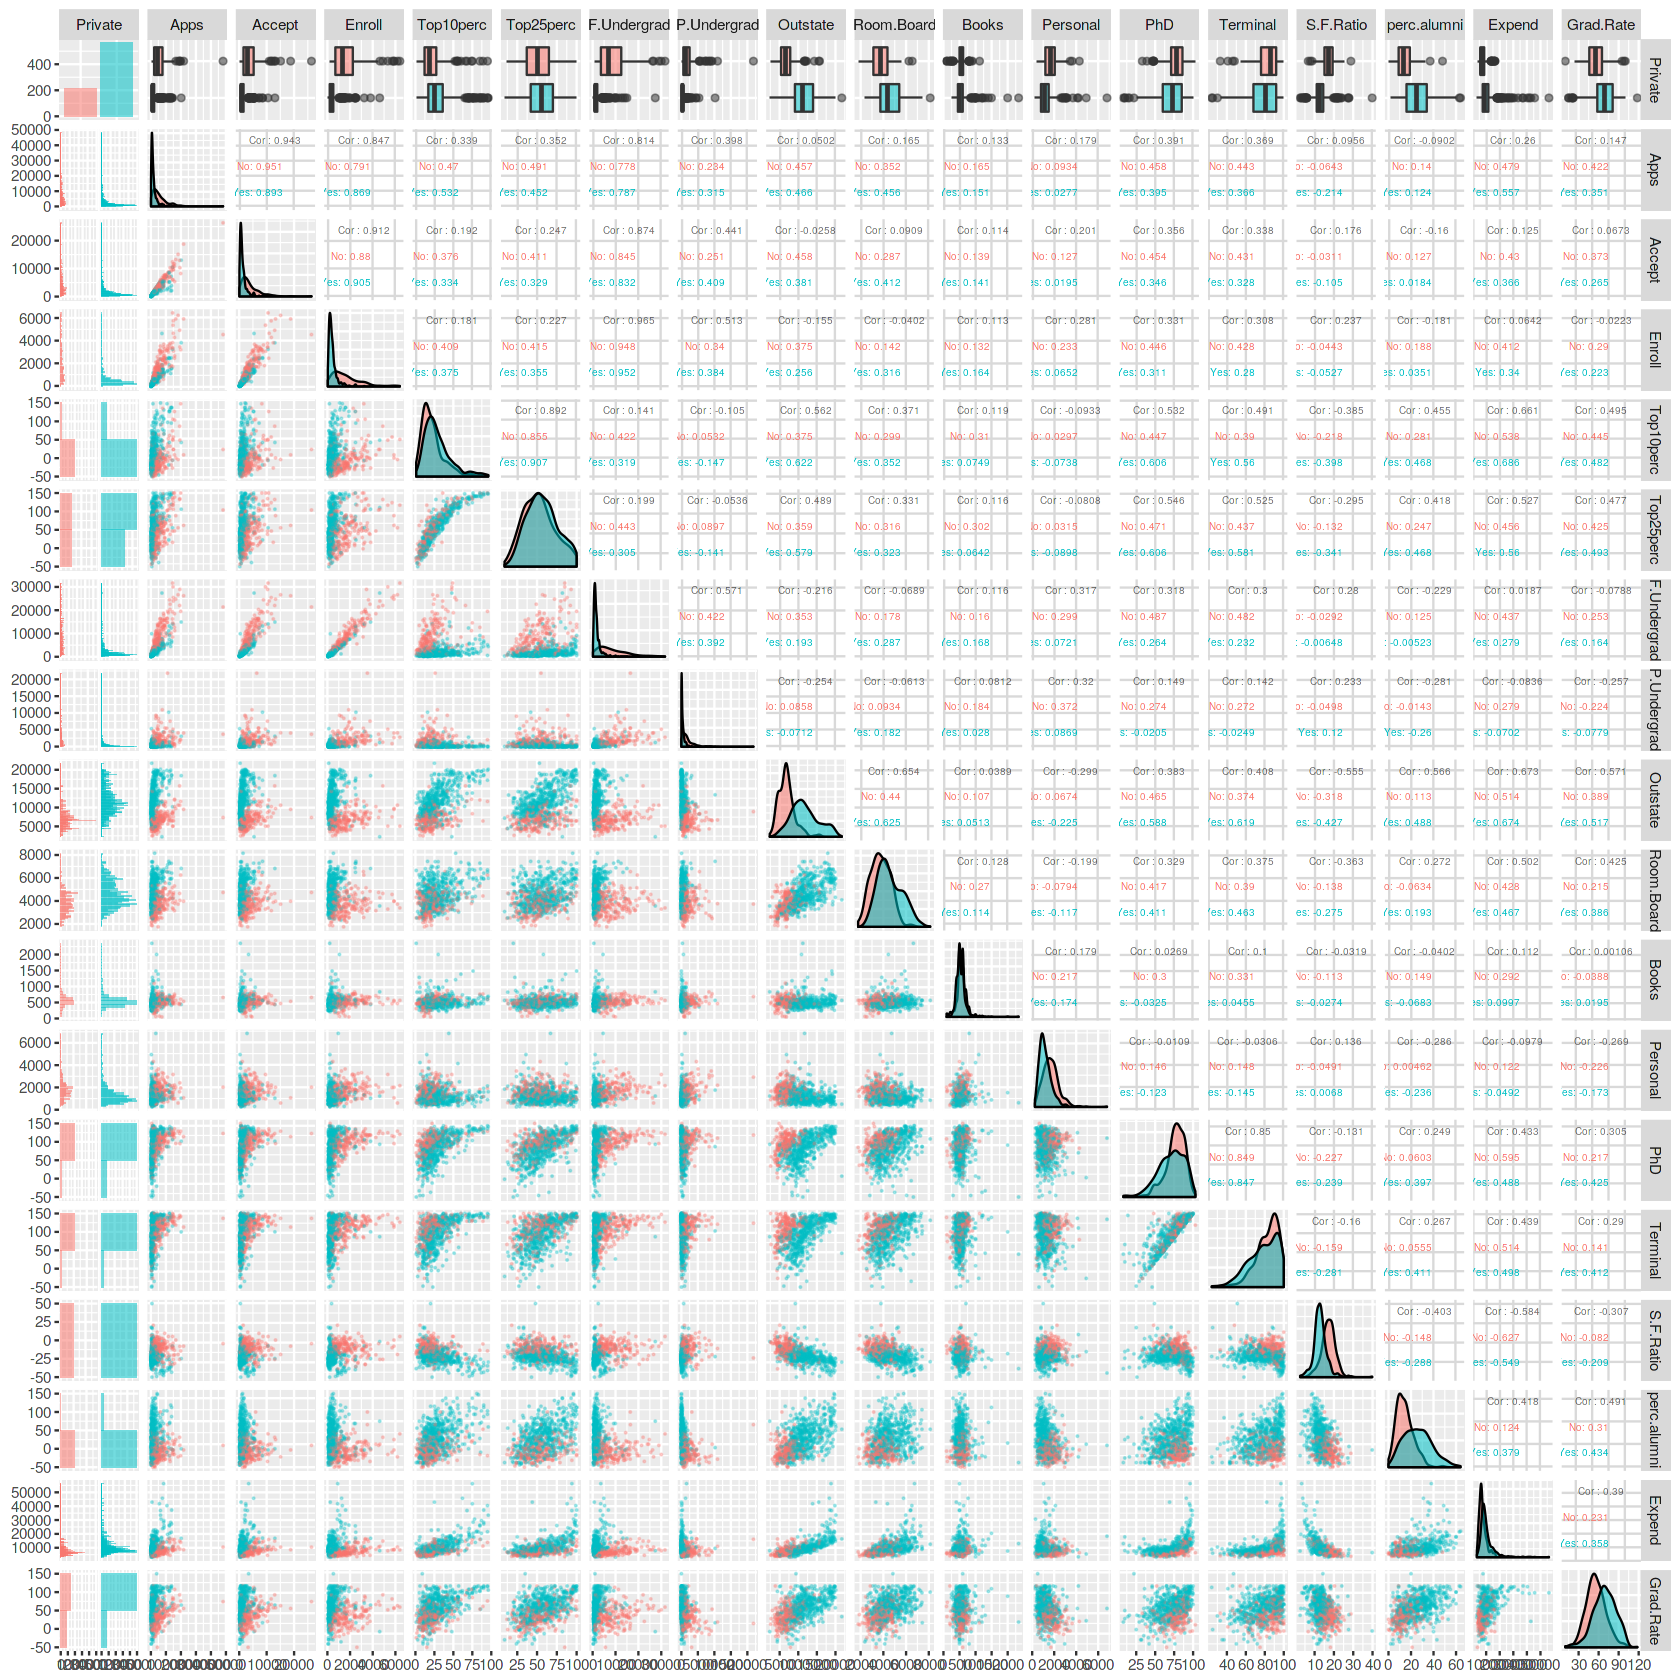

In [4]:
library("ggplot2")
library("GGally")
library("repr")

options(repr.plot.width = 14, repr.plot.height = 14)

ggpairs(
    college, 
    aes(colour = Private, alpha = 0.4), 
    lower = list(
        combo = wrap("facethist", binwidth = 100), 
        continuous = wrap("points", alpha = 0.3, size = 0.1)), 
    upper = list(
        continuous = wrap("cor", size = 2)))

There are more full-time undergraduates in public schools than in private schools. Curiously, the estimate personal spending seems a bit higher for public students.

iii. Use the `plot()` function to produce side-by-side boxplots of **Outstate** versus **Private**.

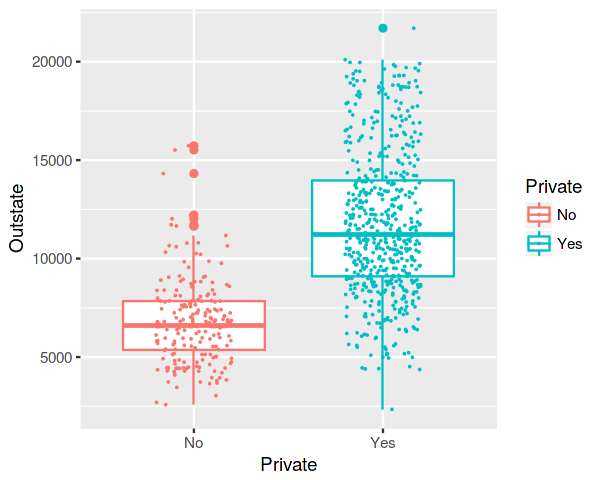

In [5]:
options(repr.plot.width = 5, repr.plot.height = 4)

ggplot(college, aes(Private, Outstate, colour = Private)) +
    geom_boxplot() + 
    geom_jitter(width = 0.2, size = 0.01)

iv. Create a new qualitative variable, called **Elite**, by binning the **Top10perc** variable. We are going to divide universities into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%. Use the `summary()` function to see how many elite universities there are.

In [6]:
Elite <- rep("No", nrow(college))
Elite[college$Top10perc >= 50] <- "Yes"
Elite <- as.factor(Elite)
college <- data.frame(college, Elite)
summary(Elite)

No Yes 
694  83

Now use the `plot()` function to produce side-by-side boxplots of **Outstate** versus **Elite**.

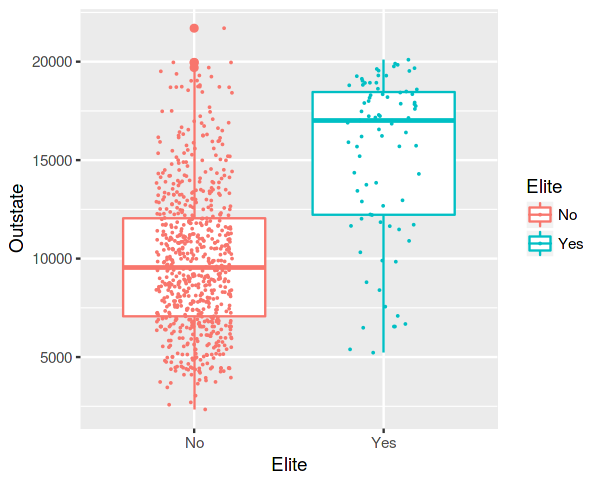

In [7]:
ggplot(college, aes(Elite, Outstate, colour = Elite)) + 
    geom_boxplot() + 
    geom_jitter(width = 0.2, size = 0.01)

v. Use the `hist()` function to produce some histograms with differing numbers of bins for a few of the quantitative variables.

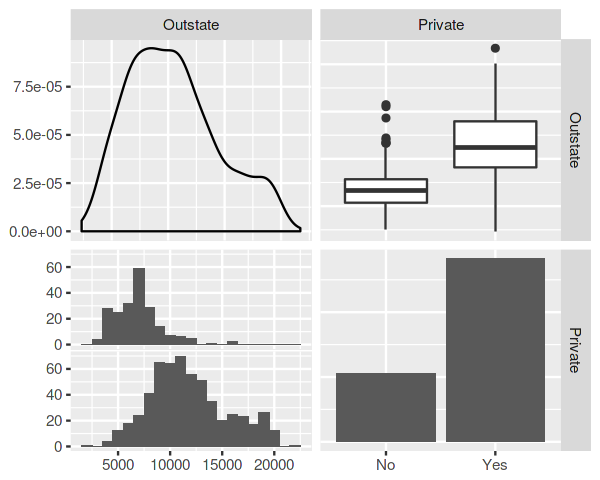

In [8]:
ggpairs(
    college, 
    columns = c("Outstate", "Private"),
    lower = list(
        combo = wrap("facethist", binwidth = 1000)))

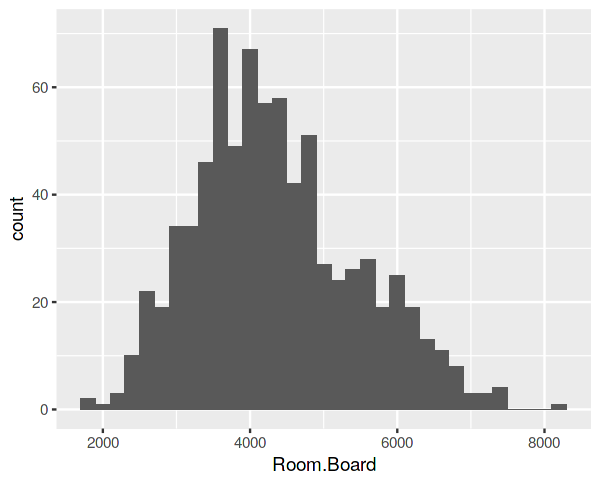

In [9]:
ggplot(college, aes(Room.Board)) + geom_histogram(binwidth = 200)

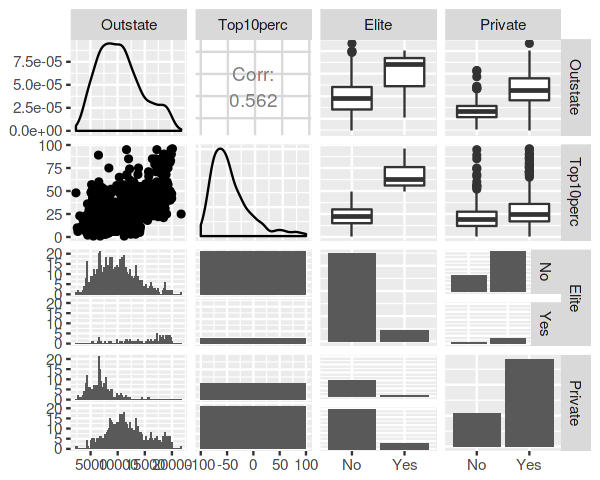

In [10]:
ggpairs(
    college[, c("Outstate", "Top10perc", "Elite", "Private")], 
    lower = list(
        combo = wrap("facethist", binwidth = 200)))

I don’t understand what is a Out-of-state private tuition. Does the value of 
out-of-state tuition actually mean the private tuition cost?

The **Elite** universities have higher out-of-state tuitions, which is expected.

Let’s see the number of applications that were sent, accepted and the final number of new students.

Also, we will compute the percentage of applications that were accepted, and the same for new students enrolled.

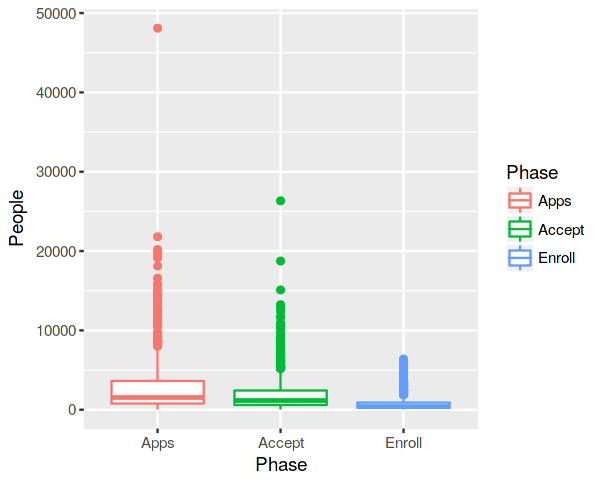

In [11]:
library("reshape2")

college$AcceptPerc <- college$Accept / college$Apps
college$EnrollPerc <- college$Enroll / college$Apps

view <- melt(
    cbind(
        row.names(college), 
        college[, c("Apps", "Accept", "Enroll")]),
    id.vars = 1)
colnames(view) <- c("University", "Phase", "People")

ggplot(view, aes(Phase, People, colour = Phase)) + geom_boxplot() 

There is a single university with almost 50k applications. Let’s see which one it is.array

In [12]:
famous.university <- college[which.max(college$Apps), ]
famous.university

Private Apps  Accept Enroll Top10perc Top25perc F.Undergrad P.Undergrad Outstate Room.Board ⋯ Personal PhD Terminal S.F.Ratio perc.alumni Expend Grad.Rate Elite AcceptPerc
Rutgers at New Brunswick No      48094 26330  4520   36        79        21401       3712        7410     4748       ⋯ 2009     90  95       19.5      19          10474  77        No    0.5474695 
                         EnrollPerc
Rutgers at New Brunswick 0.09398262

It is a public university, with a low **Top10perc**. Let’s draw the boxplots again with horizontal lines marking this specific observation in each boxplot.

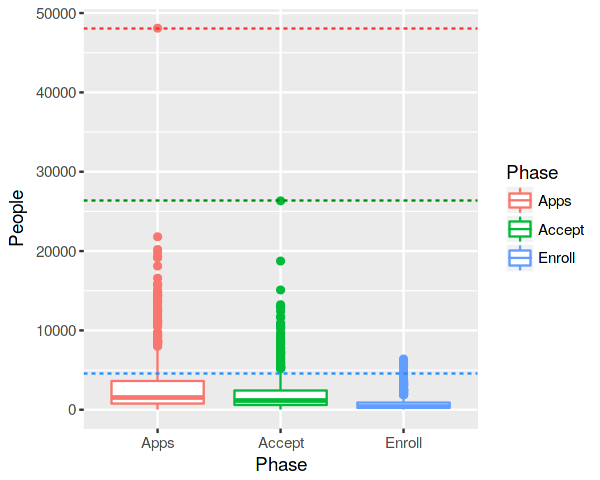

In [13]:
ggplot(view, aes(Phase, People, colour = Phase)) + 
    geom_boxplot() +
    geom_hline(yintercept = famous.university$Apps, 
               linetype = "dashed", color = "firebrick1") +
    geom_hline(yintercept = famous.university$Accept, 
               linetype = "dashed", color = "green4") +
    geom_hline(yintercept = famous.university$Enroll, 
               linetype = "dashed", color = "dodgerblue1")

Let’s plot the percentage of applications that were accepted, and the same for new students enrolled.

We will add the same horizontal lines marking where **Rutgers at New Brunswick** is located.

AcceptPerc EnrollPerc
Rutgers at New Brunswick 0.55       0.09

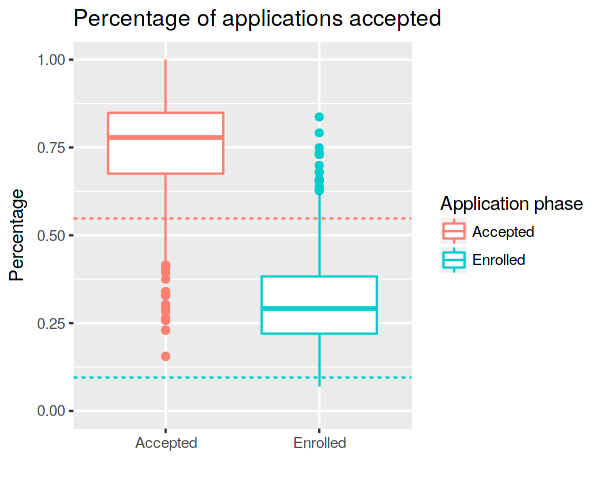

In [14]:
view <- melt(
    cbind(
        row.names(college), 
        college[, c("AcceptPerc", "EnrollPerc")]),
    id.vars = 1)
colnames(view) <- c("University", "Phase", "People")

ggplot(view, aes(Phase, People, colour = Phase)) + 
    geom_boxplot() +
    geom_hline(
        yintercept = famous.university$AcceptPerc, 
        linetype = "dashed", 
        color = "salmon") +
    geom_hline(
        yintercept = famous.university$EnrollPerc, 
        linetype = "dashed", 
        color = "#00cccc") +
    scale_y_continuous(limit = c(0, 1)) +
    scale_x_discrete(labels = c("Accepted", "Enrolled")) +
    scale_colour_manual(
        values = c("salmon", "#00cccc"),
        labels = c("Accepted", "Enrolled")) +
    labs(title = "Percentage of applications accepted",
         x = "", 
         y = "Percentage",
         colour = "Application phase")

round(famous.university[, c("AcceptPerc", "EnrollPerc")], 2)

Out of the almost 49k application **Rutgers at New Brunswick** has received, 50% was accepted, and only 10% of the total students actually enrolled.

### Exercise 9: The Auto data set

The Auto MPG data set has gas mileage, horsepower, and other information for cars.

*“The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.”* (Quinlan, 1993)

Make sure that the missing values have been removed from the data.

In [15]:
auto <- read.csv("data/Auto.csv", header = TRUE, na.strings = "?")
cat("Dimensions:", dim(auto), "—",
    "without missings:", dim(na.omit(auto)), "\n")
auto <- na.omit(auto)
rownames(auto) <- paste(auto$name, rownames(auto))
auto <- auto[, -ncol(auto)]
head(auto)

Dimensions: 397 9 — without missings: 392 9 


mpg cylinders displacement horsepower weight acceleration year origin
chevrolet chevelle malibu 1 18  8         307          130        3504   12.0         70   1     
buick skylark 320 2         15  8         350          165        3693   11.5         70   1     
plymouth satellite 3        18  8         318          150        3436   11.0         70   1     
amc rebel sst 4             16  8         304          150        3433   12.0         70   1     
ford torino 5               17  8         302          140        3449   10.5         70   1     
ford galaxie 500 6          15  8         429          198        4341   10.0         70   1

(a) Which of the predictors are quantitative, and which are qualitative?

**Variable** | **Type** | **Description**
:- | :- | :-
**mpg** | continuous | Miles Per Gallon, the fuel efficiency
**cylinders** | multi-valued discrete | 
**displacement** | continuous | The volume of the car’s engine in cubic inches
**horsepower** | continuous | The rate at which mechanical energy is expended
**weight** | continuous | The car’s weight
**acceleration** | continuous | The car’s acceleration
**model year** | multi-valued discrete | Year of fabrication
**origin** | multi-valued discrete | 
**car name** | string | Not unique for each instance

(b) What is the *range* of each quantitative predictor? You can answer this using the `range()` function.

In [16]:
apply(auto, 2, range)

mpg  cylinders displacement horsepower weight acceleration year origin
[1,]  9.0 3          68           46        1613    8.0         70   1     
[2,] 46.6 8         455          230        5140   24.8         82   3

(c) What is the mean and standard deviation of each quantitative predictor?

In [17]:
library("dplyr")

mean.and.sd <- function(data) {
    data %>% 
        melt %>% 
        group_by(variable) %>% 
        summarise_all(funs(mean, sd)) %>% 
        mutate_at(vars(mean, sd), funs(round(., 1)))
}

mean.and.sd(auto)

No id variables; using all as measure variables


variable     mean   sd   
1 mpg            23.4   7.8
2 cylinders       5.5   1.7
3 displacement  194.4 104.6
4 horsepower    104.5  38.5
5 weight       2977.6 849.4
6 acceleration   15.5   2.8
7 year           76.0   3.7
8 origin          1.6   0.8

(d) Now remove the 10th through 85th observations. What is the
range, mean, and standard deviation of each predictor in the
subset of the data that remains?

In [18]:
mean.and.sd(auto[-{10:85}, ])

No id variables; using all as measure variables


variable     mean   sd   
1 mpg            24.4   7.9
2 cylinders       5.4   1.7
3 displacement  187.2  99.7
4 horsepower    100.7  35.7
5 weight       2936.0 811.3
6 acceleration   15.7   2.7
7 year           77.1   3.1
8 origin          1.6   0.8

(e) Using the full data set, investigate the predictors graphically,
using scatterplots or other tools of your choice. Create some plots
highlighting the relationships among the predictors. Comment
on your findings.

#### Paired plots

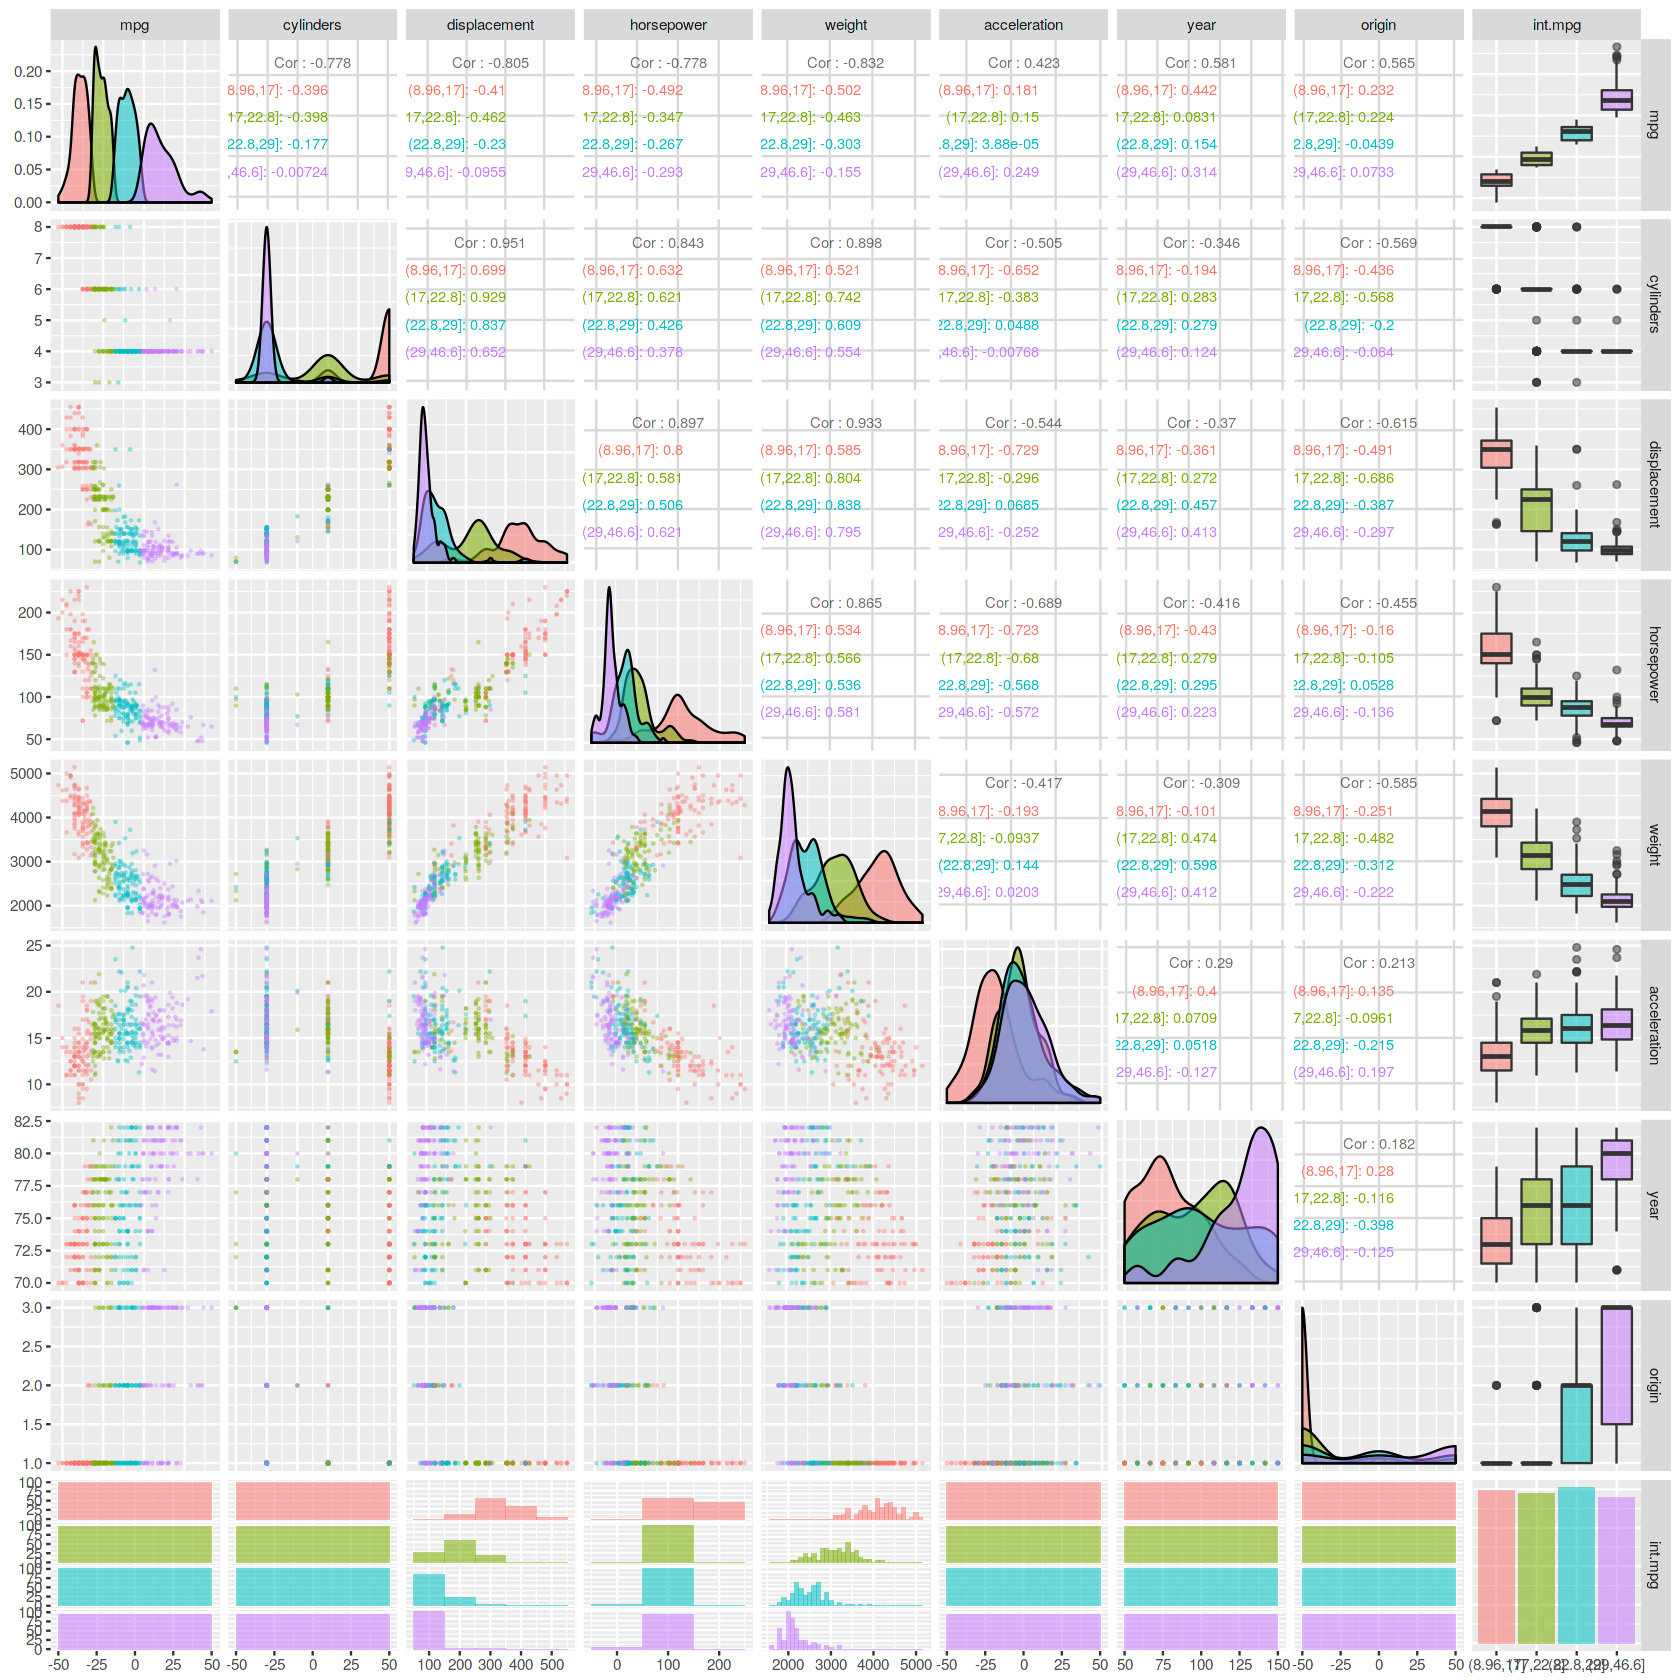

In [19]:
library("lsr")

options(repr.plot.width = 14, repr.plot.height = 14)

auto.pairs <- auto
auto.pairs$int.mpg <- quantileCut(auto.pairs$mpg, 4)

ggpairs(
    auto.pairs, 
    aes(alpha = 0.4, color = int.mpg),
    lower = list(
        combo = wrap("facethist", binwidth = 100), 
        continuous = wrap("points", alpha = 0.3, size = 0.3)), 
    upper = list(
        continuous = wrap("cor", size = 3)))

The higher the acceleration, the weight, and the horsepower, the less efficient the car is. As it consumes more fuel, the Miles Per Gallon decreases.

These features seem highly correlated to **MPG** measure. Let’s see the correlation matrix.

#### Correlation

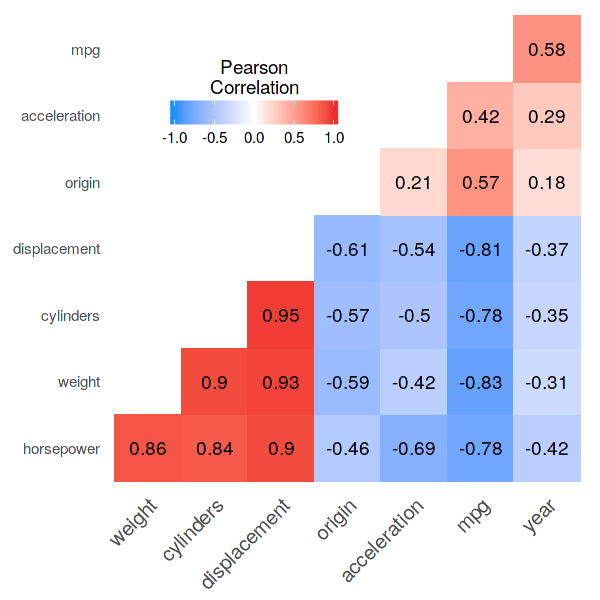

In [20]:
# Adapted from http://www.sthda.com/english/wiki/ggplot2-quick-correlation-matrix-heatmap-r-software-and-data-visualization
options(repr.plot.width = 5, repr.plot.height = 5)

get.upper.tri <- function(mat) {
    mat[upper.tri(mat)] <- NA
    diag(mat) <- NA
    mat
}

# Use correlation between variables as distance
reorder.corr <- function(mat){
    dd <- as.dist((1 - mat) / 2)
    hc <- hclust(dd)
    cormat <- mat[hc$order, hc$order]
}

corr <- round(cor(auto), 2)
corr <- reorder.corr(corr)
corr <- get.upper.tri(corr)
corr <- melt(corr, na.rm = TRUE)

ggplot(data = corr, aes(x = Var1, y = Var2, fill = value, label = value)) + 
    geom_tile() + 
    scale_fill_gradient2(
        low = "dodgerblue", 
        high = "firebrick2", 
        mid = "white", 
        midpoint = 0, 
        limit = c(-1, 1), 
        space = "Lab",
        name = "Pearson\nCorrelation") + 
    theme(
        axis.text.x = element_text(
            angle = 45, 
            vjust = 1, 
            size = 12, 
            hjust = 1)) + 
    coord_fixed() + 
    geom_text() + 
    theme(
        axis.title.x = element_blank(), 
        axis.title.y = element_blank(), 
        panel.background = element_blank(), 
        axis.ticks = element_blank(), 
        legend.justification = c(1, 0), 
        legend.position = c(0.5, 0.7), 
        legend.direction = "horizontal") + 
    guides(
        fill = guide_colorbar(
            barwidth = 7, 
            barheight = 1, 
            title.position = "top", 
            title.hjust = 0.5))

As the years passed, the cars have gotten more efficient in general. But they not necessarily have decreased in size or power.

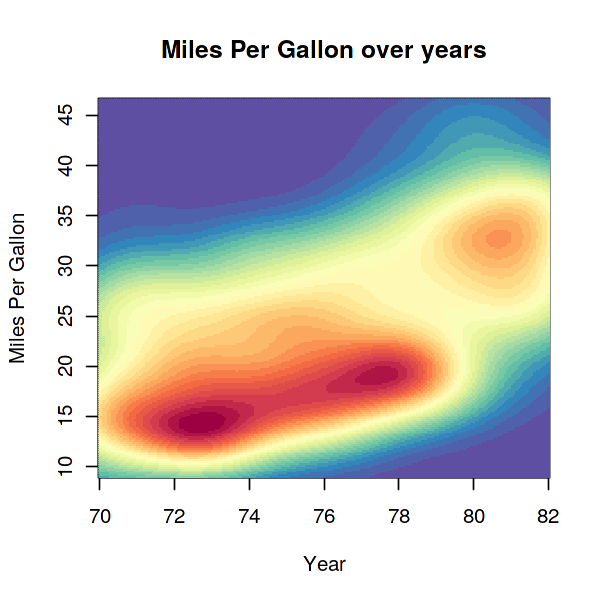

In [21]:
library("MASS")
library("RColorBrewer")

options(repr.plot.width = 5, repr.plot.height = 5)

rf <- colorRampPalette(rev(brewer.pal(11, "Spectral")))
r <- rf(32)

k <- kde2d(auto$year, auto$mpg, n = 200)
image(k, col = r, xlab = "Year", ylab = "Miles Per Gallon")
title("Miles Per Gallon over years")

It seems the MPG doubled in a decade. Let’s confirm.

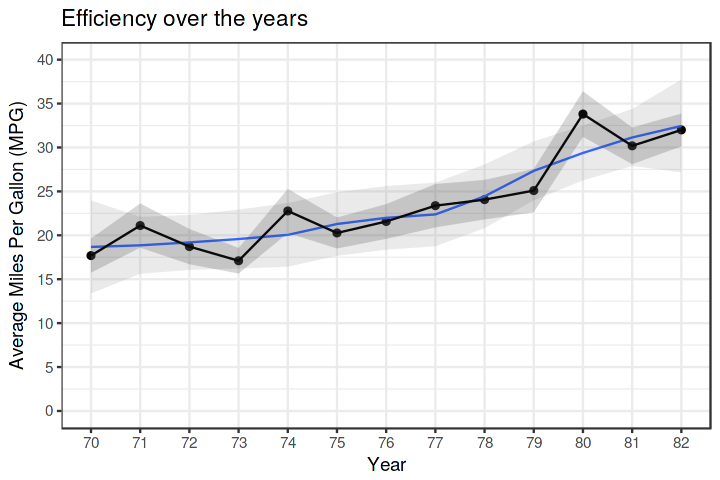

In [22]:
options(repr.plot.width = 6, repr.plot.height = 4)

by.year <- auto %>% 
    group_by(year) %>% 
    summarise(
        n = n(),
        mpg.mean = mean(mpg), 
        mpg.sd = sd(mpg))
by.year$mpg.min <- by.year$mpg.mean - 1.96 * by.year$mpg.sd / sqrt(by.year$n)
by.year$mpg.max <- by.year$mpg.mean + 1.96 * by.year$mpg.sd / sqrt(by.year$n)

ggplot(by.year, aes(year, mpg.mean)) + 
    theme_bw() +
    geom_point() +
    geom_smooth(method = "loess", size = 0.5, alpha = 0.2) +
    geom_line() + 
    geom_ribbon(aes(ymin = mpg.min, ymax = mpg.max), alpha = 0.2) +
    scale_y_continuous(limit = c(0, 40), breaks = seq(0, 40, 5)) +
    scale_x_discrete(limit = by.year$year) +
    scale_fill_manual(name="Bla",
        values=c(mpg.mean="#008B00")) +
    xlab("Year") +
    ylab("Average Miles Per Gallon (MPG)") +
    ggtitle("Efficiency over the years") 

Visually I would say the MPG increased by 10 gallons in a decade, from ~29 in 1970 to ~29 (the smooth line) in 1980. I prefer using the smooth line than the observed data because the average fell down in 1981.

(f) Suppose that we wish to predict gas mileage (**mpg**) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting **mpg**? Justify your answer.

Yes, the 1970s decade had a great improvement on the car engines and the plots suggest the specification of engines can predict the fuel efficiency.

### Exercise 10: The Boston data set

In [23]:
library("MASS")

data(Boston)

(a) [...] How many rows are in this data set? How many columns? What
do the rows and columns represent?

Description collected from the manual, `?Boston`. This a data set of housing values in Boston suburbs.

**Variable** | **Description**
:- | :-
**crim** | per capita crime rate by town.
**zn** | proportion of residential land zoned for lots over 25,000 sq.ft.
**indus** | proportion of non-retail business acres per town.
**chas** | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
**nox** | $NO_x$, nitrogen oxides concentration (parts per 10 million).
**rm** | average number of rooms per dwelling.
**age** | proportion of owner-occupied units built prior to 1940.
**dis** | weighted mean of distances to five Boston employment centres.
**rad** | index of accessibility to radial highways.
**tax** | full-value property-tax rate per \$10,000.
**ptratio** | pupil-teacher ratio by town.
**black** | $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town.
**lstat** | lower status of the population (percent).
**medv** | median value of owner-occupied homes in \$1000s.


In [24]:
dim(Boston)

[1] 506  14

In [25]:
head(Boston)

crim    zn indus chas nox   rm    age  dis    rad tax ptratio black  lstat medv
1 0.00632 18 2.31  0    0.538 6.575 65.2 4.0900 1   296 15.3    396.90 4.98  24.0
2 0.02731  0 7.07  0    0.469 6.421 78.9 4.9671 2   242 17.8    396.90 9.14  21.6
3 0.02729  0 7.07  0    0.469 7.185 61.1 4.9671 2   242 17.8    392.83 4.03  34.7
4 0.03237  0 2.18  0    0.458 6.998 45.8 6.0622 3   222 18.7    394.63 2.94  33.4
5 0.06905  0 2.18  0    0.458 7.147 54.2 6.0622 3   222 18.7    396.90 5.33  36.2
6 0.02985  0 2.18  0    0.458 6.430 58.7 6.0622 3   222 18.7    394.12 5.21  28.7

(b) Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your findings.

Let’s start discretizing the crime rate into four quantiles.

In [26]:
table(quantileCut(Boston$crim, 4))


(-0.0826,0.082]   (0.082,0.257]    (0.257,3.68]     (3.68,89.1] 
            127             126             126             127 

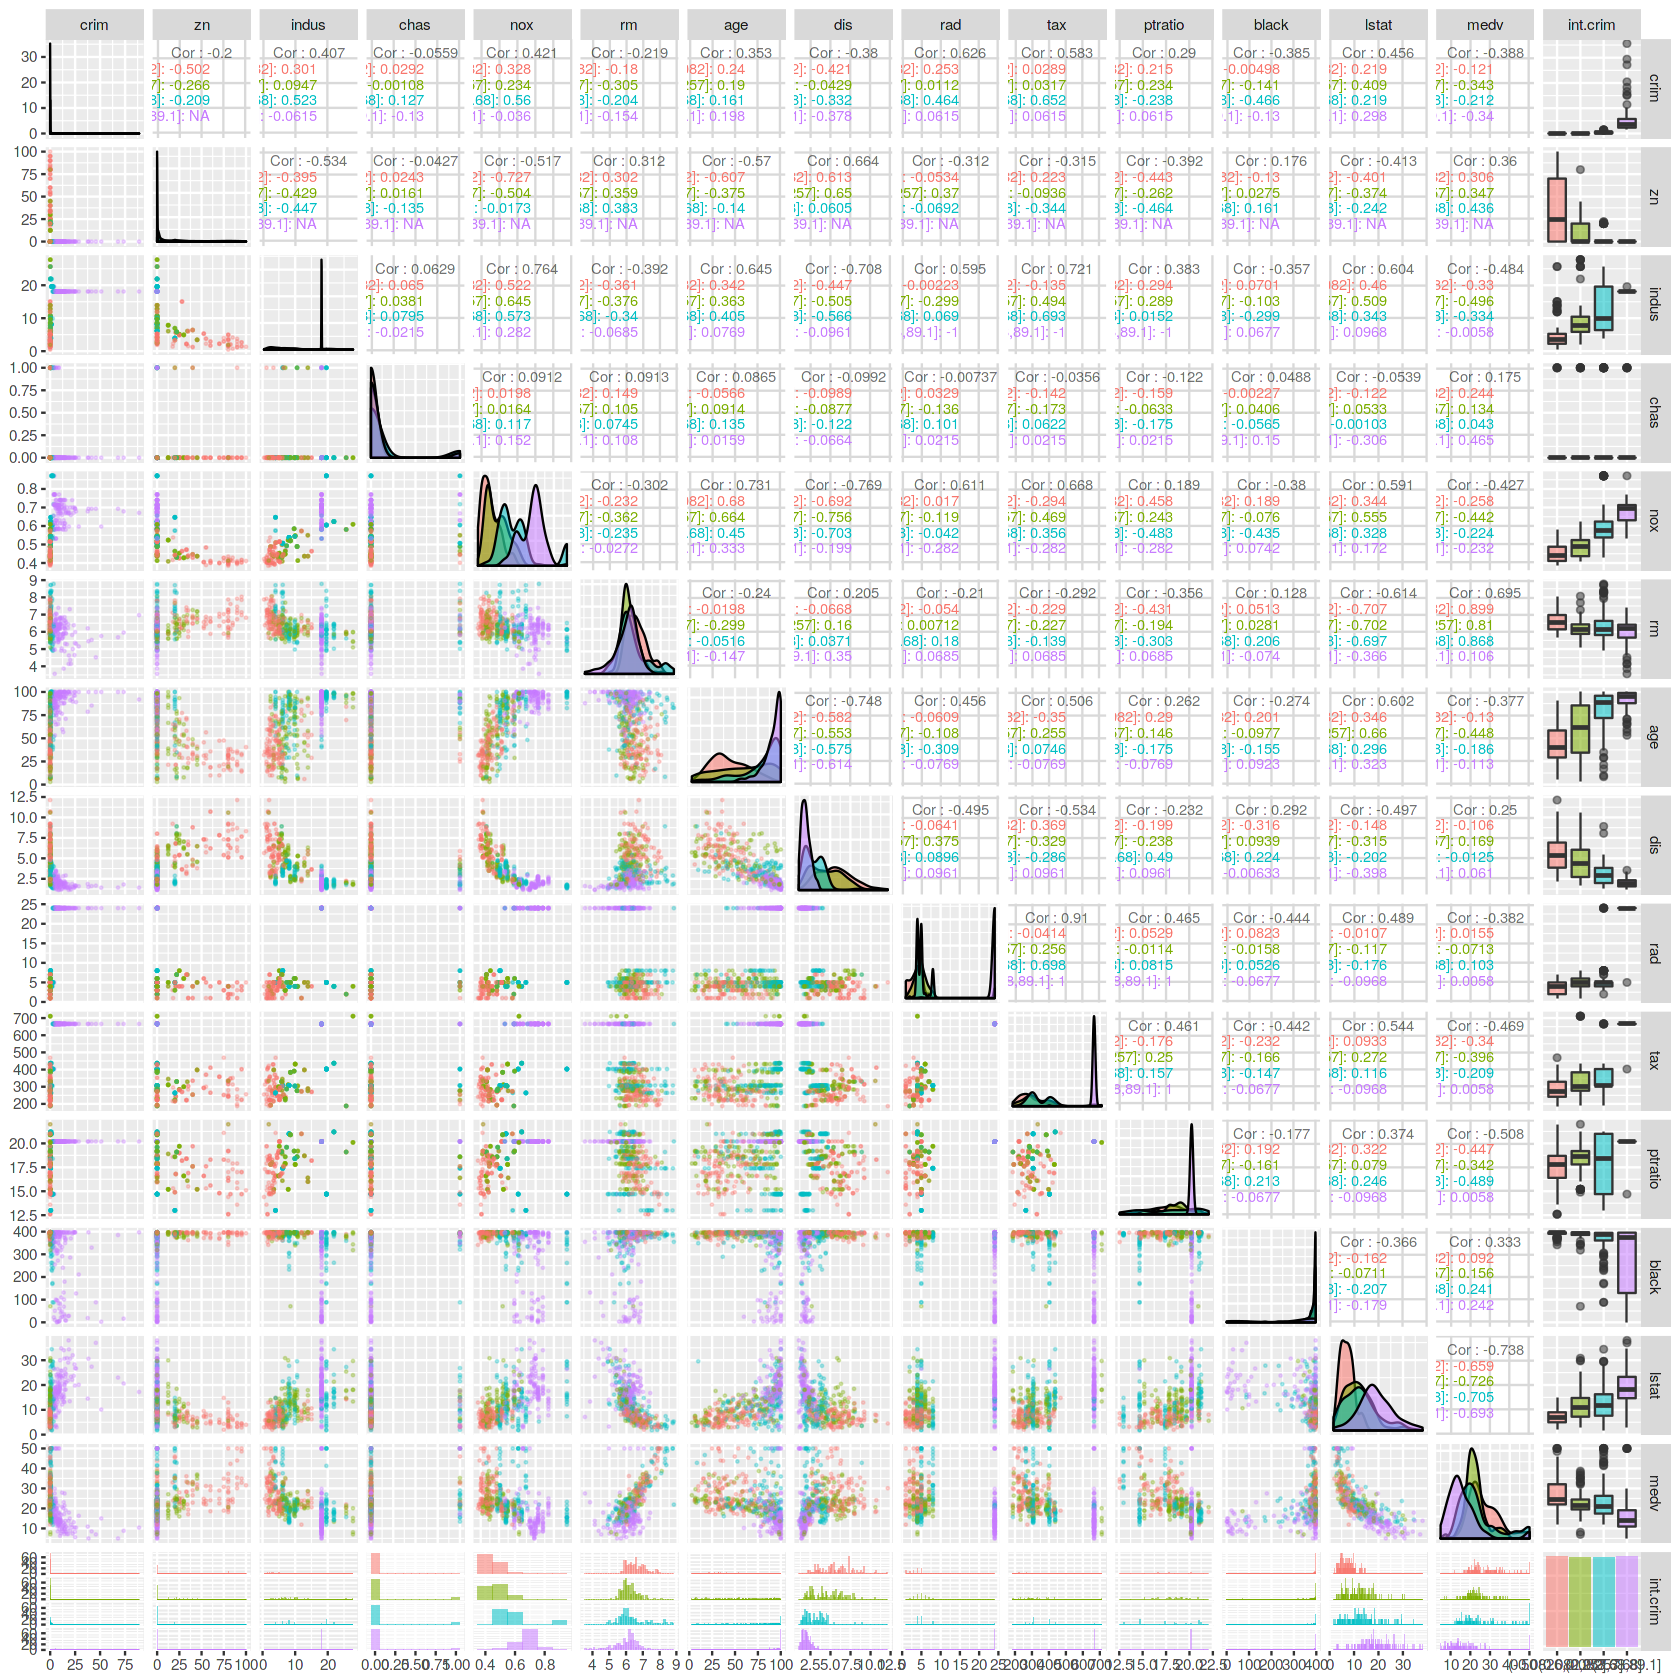

In [27]:
options(repr.plot.width = 14, repr.plot.height = 14)

boston.pairs <- Boston
boston.pairs$int.crim <- quantileCut(boston.pairs$crim, 4)

suppressWarnings(print(ggpairs(
    boston.pairs, 
    aes(alpha = 0.4, color = int.crim),
    lower = list(
        combo = wrap("facethist", binwidth = 0.1), 
        continuous = wrap("points", alpha = 0.3, size = 0.3)), 
    upper = list(
        continuous = wrap("cor", size = 3)))))

Lower status of population (**lstat**) and average number of rooms per dwelling (**rm**) are strongly correlated with the median value of owner-occupied homes in \$1000s (**medv**). Let’s visualize the correlation with the correlation matrix. 

It seems some features have many constant values. Let’s check this with a heat map of the values.

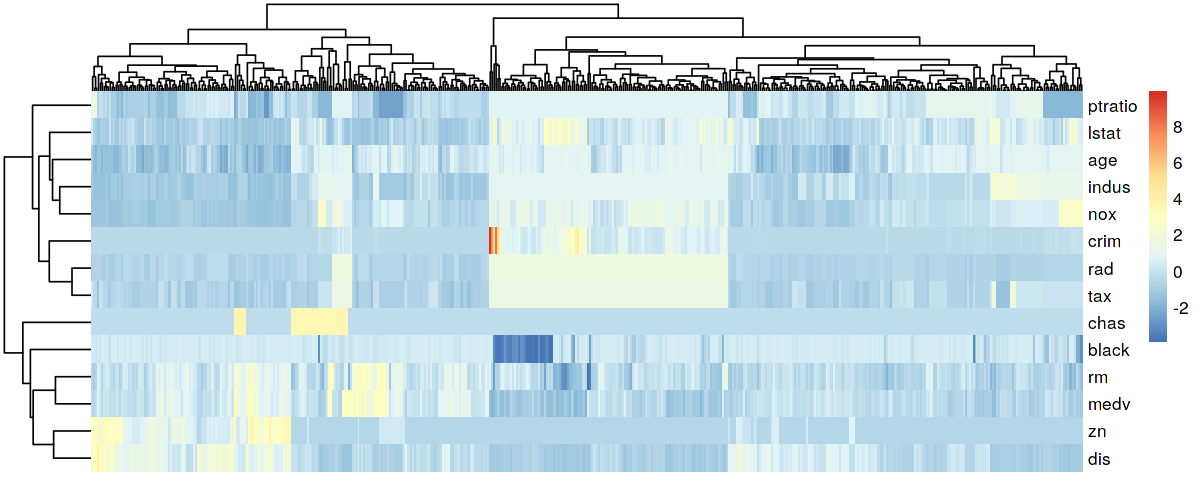

In [28]:
library("pheatmap")

options(repr.plot.width = 10, repr.plot.height = 4)

pheatmap(t(scale(Boston)), show_colnames = FALSE)

Indeed, the correlation dendrogram of columns above shows that some features 
have many constant values at the same time, implying the existance of colinear predictors. 

Note how the index of accessibility to radial highways (**rad**) and 
the full-value property-tax rate per \$10,000 (**tax**) have a constant value 
together. The pupil–teacher ration (**ptratio**) also seem to be constant at the same times —
observe the upper dendrogram of rows. However, **ptratio** 
is clustered way after (**rad**, **tax**) were.

Let’s see which values **rad** and **tax** assume.

In [29]:
library("IRdisplay")

display_markdown("#### rad")
summary(Boston$rad)
table(Boston$rad)

display_markdown("#### tax")
summary(Boston$tax)
tax.table <- table(Boston$tax)
tax.table[tax.table > 10]

display_markdown("#### ptratio")
summary(Boston$ptratio)
ptratio.table <- table(Boston$ptratio)
ptratio.table[ptratio.table > 10]

#### rad

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   5.000   9.549  24.000  24.000 


  1   2   3   4   5   6   7   8  24 
 20  24  38 110 115  26  17  24 132 

#### tax

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  187.0   279.0   330.0   408.2   666.0   711.0 


264 277 304 307 384 398 403 437 666 
 12  11  14  40  11  12  30  15 132 

#### ptratio

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.60   17.40   19.05   18.46   20.20   22.00 


  13 14.7 15.2 16.6 17.4 17.8 17.9 18.4 18.6 19.1 19.2 20.2 20.9   21 21.2 
  12   34   13   16   18   23   11   16   17   17   19  140   11   27   15 

It looks like when **rad** is 24, **tax** is 666. Let’s confirm and also get
the values for **ptratio**.

In [30]:
rad.rows <- Boston$rad == 24
tax.rows <- Boston$tax == 666
ptratio.rows <- Boston$ptratio == 20.2

cbind(apply(Boston[rad.rows, c("rad", "tax", "ptratio")], 2, summary),
      apply(Boston[tax.rows, c("rad", "tax", "ptratio")], 2, summary),
      apply(Boston[ptratio.rows, c("rad", "tax", "ptratio")], 2, summary))

rad tax ptratio rad tax ptratio rad      tax      ptratio
Min.    24  666 20.2    24  666 20.2     5.00000 224.0000 20.2   
1st Qu. 24  666 20.2    24  666 20.2    24.00000 666.0000 20.2   
Median  24  666 20.2    24  666 20.2    24.00000 666.0000 20.2   
Mean    24  666 20.2    24  666 20.2    22.91429 640.7429 20.2   
3rd Qu. 24  666 20.2    24  666 20.2    24.00000 666.0000 20.2   
Max.    24  666 20.2    24  666 20.2    24.00000 666.0000 20.2

So, we know that if **rad** is 24, then **rad** is 666, and the other way around also holds.

We can also say that if **rad** is 24, then **ptratio** is 666, but the back is not true because there is at least a **rad** and **tax** with values 5 and 224 when **ptratio**  is 666.

Now we can have some initial insights (that need to be verified):

Regarding the median house values (**medv**):
- Houses with more rooms (**rm**) are more expensive (**medv**)
- Poorer areas (**lstat**) reduce the price of houses 
- Expensive houses have a lower tax rate, perhaps because the tax is limited to a value.
- The atmospheric chemistry (**nox**) is a measure of nitric oxide (NO) and nitrogen dioxide (NO2) in the area. Industrial areas of town centers can have a higher concentration, which is associated with a reduced price of houses. In fact, the proportion of non-retail business acres per town (**indus**) has a high correlation with **nox**.
- The pupil–teacher ratio by town (**ptarion**) seems to be related with **proportion of residential land zoned**

(c) Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.

Let’s plot the correlation matrix.

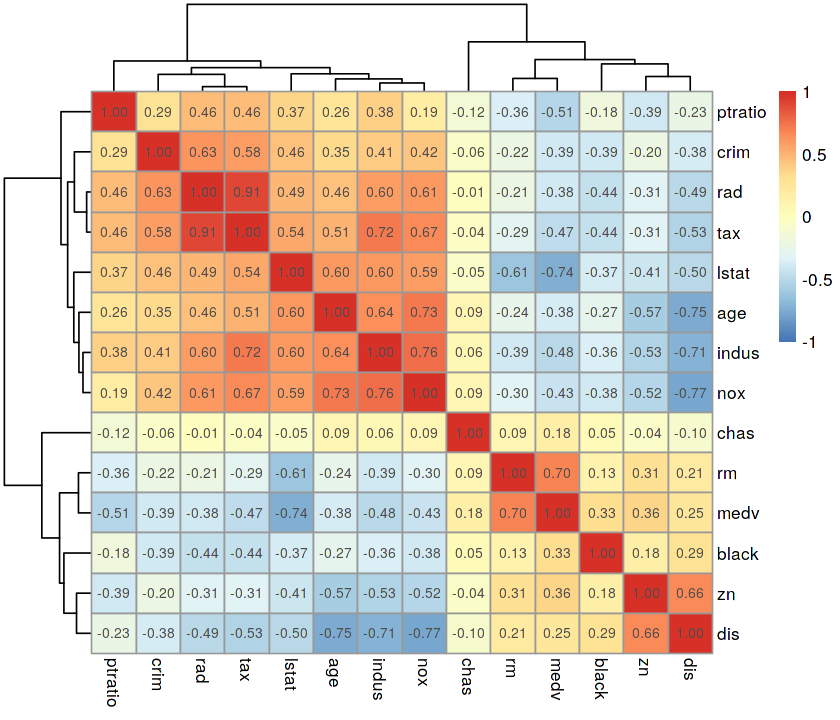

In [31]:
options(repr.plot.width = 7, repr.plot.height = 6)

pheatmap(cor(Boston, use="pairwise.complete.obs"), 
         display_numbers = TRUE,
         breaks = seq(-1, 1, 0.02))

These predictors seem to be related to the crime rate:

- Positive, higher than 0.3: **rad, tax, lstat, age, indus, nox**
- Negative, lower than -0.3: **medv, black, dis**

Alternatively, we can build this matrix using `ggplot`.

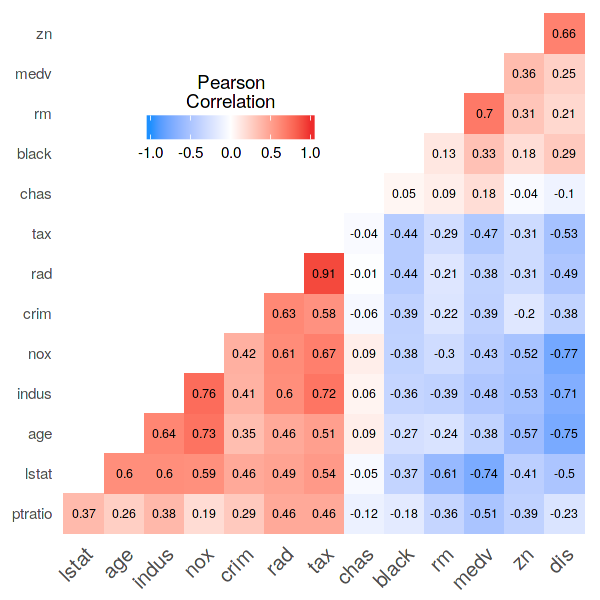

In [32]:
# Adapted from http://www.sthda.com/english/wiki/ggplot2-quick-correlation-matrix-heatmap-r-software-and-data-visualization
options(repr.plot.width = 5, repr.plot.height = 5)

get.upper.tri <- function(mat) {
    mat[upper.tri(mat)] <- NA
    diag(mat) <- NA
    mat
}

# Use correlation between variables as distance
reorder.corr <- function(mat){
    dd <- as.dist((1 - mat) / 2)
    hc <- hclust(dd)
    cormat <- mat[hc$order, hc$order]
}

corr <- round(cor(Boston), 2)
corr <- reorder.corr(corr)
corr <- get.upper.tri(corr)
corr <- melt(corr, na.rm = TRUE)

ggplot(data = corr, aes(x = Var1, y = Var2, fill = value, label = value)) + 
    geom_tile() + 
    scale_fill_gradient2(
        low = "dodgerblue", 
        high = "firebrick2", 
        mid = "white", 
        midpoint = 0, 
        limit = c(-1, 1), 
        space = "Lab",
        name = "Pearson\nCorrelation") + 
    theme(
        axis.text.x = element_text(
            angle = 45, 
            vjust = 1, 
            size = 12, 
            hjust = 1)) + 
    coord_fixed() + 
    geom_text(size = 2.5) + 
    theme(
        axis.title.x = element_blank(), 
        axis.title.y = element_blank(), 
        panel.background = element_blank(), 
        axis.ticks = element_blank(), 
        legend.justification = c(1, 0), 
        legend.position = c(0.5, 0.7), 
        legend.direction = "horizontal") + 
    guides(
        fill = guide_colorbar(
            barwidth = 7, 
            barheight = 1, 
            title.position = "top", 
            title.hjust = 0.5))

(d) Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil–teacher ratios? Comment on
the range of each predictor.

#### High crime rates


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



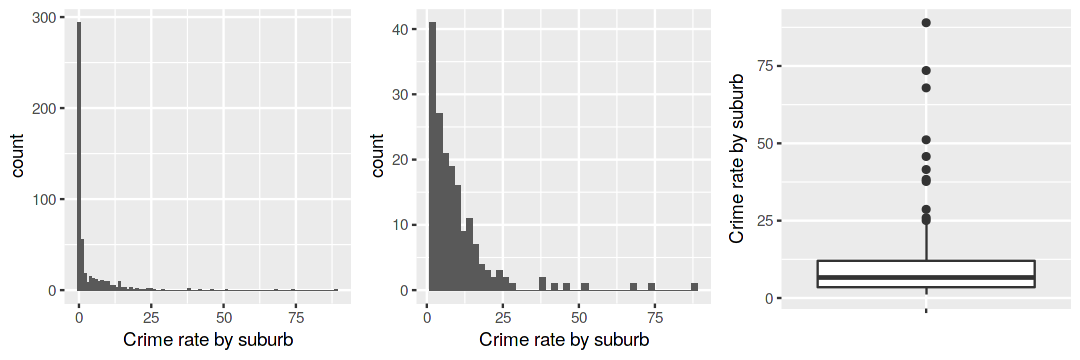

In [33]:
library("gridExtra")

options(repr.plot.width = 9, repr.plot.height = 3)

large.crim <- Boston[Boston$crim > 1, ]

# Plot all values
p1 <- ggplot(Boston, aes(crim)) + geom_histogram(binwidth = 1) +
    xlab("Crime rate by suburb")
# Plot only crime rates above 1
p2 <- ggplot(large.crim, aes(crim)) +  geom_histogram(binwidth = 2) +
    xlab("Crime rate by suburb")
p3 <- ggplot(large.crim, aes(x = "", y = crim)) + geom_boxplot() +
    xlab("") +
    ylab("Crime rate by suburb")

grid.arrange(p1, p2, p3, ncol = 3)

The suburds that seem to have high crime rates far higher than the others 
are those which the crime rate exceeds 25%:

In [34]:
which(Boston$crim > 25)

[1] 381 399 401 405 406 411 414 415 418 419 428

#### Tax rates

In [35]:
table(Boston$tax)


187 188 193 198 216 222 223 224 226 233 241 242 243 244 245 247 252 254 255 256 264 265 270 273 276 277 279 280 281 284 285 287 289 293 296 300 304 305 307 311 313 315 329 330 334 335 337 345 348 351 
  1   7   8   1   5   7   5  10   1   9   1   2   4   1   3   4   2   5   1   1  12   2   7   5   9  11   4   1   4   7   1   8   5   3   8   7  14   4  40   7   1   2   6  10   2   2   2   3   2   1 
352 358 370 384 391 398 402 403 411 422 430 432 437 469 666 711 
  2   3   2  11   8  12   2  30   2   1   3   9  15   1 132   5 

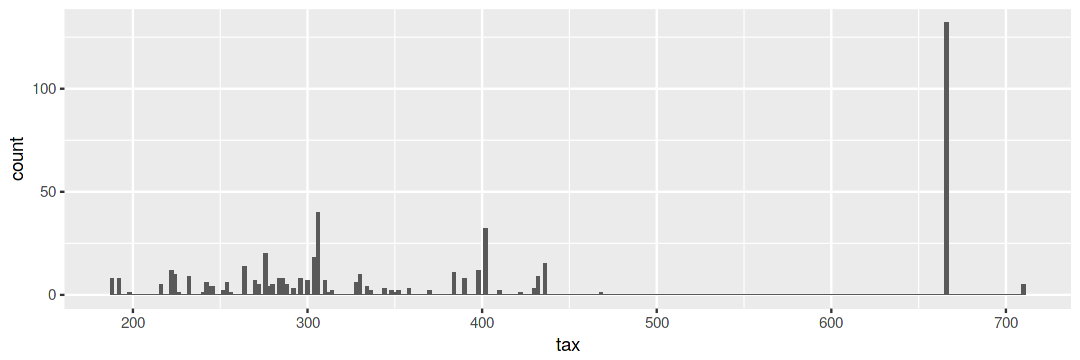

In [36]:
ggplot(Boston, aes(tax)) + geom_histogram(binwidth = 2)

Although 666 looked an outlier, there are a few tax vaues even higher, 711.
If actual values, they are quite high compared to the the rest.

#### Pupil–Teacher Ratio

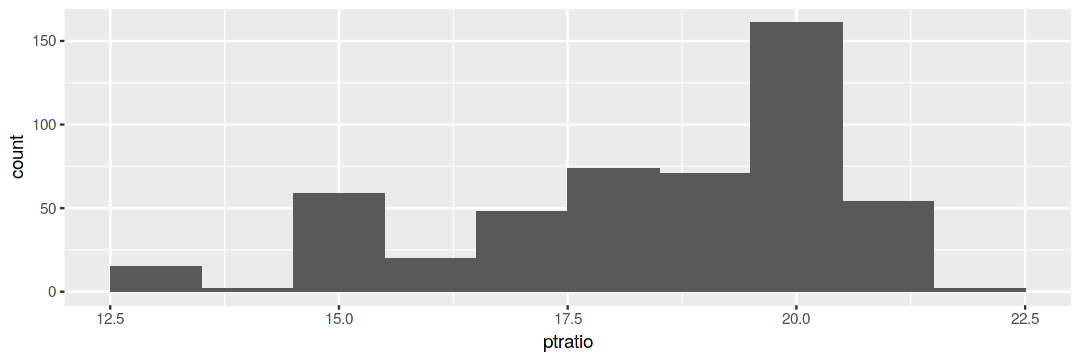

In [37]:
ggplot(Boston, aes(ptratio)) + geom_histogram(binwidth = 1)

Since 22.5 pupils for each teacher is acceptable, the pupil–teacher ratio looks 
without high ratios.

(e) How many of the suburbs in this data set bound the Charles
river?

In [38]:
table(Boston$chas)


  0   1 
471  35 

(f) What is the median pupil-teacher ratio among the towns in this data set?

In [39]:
median(Boston$ptratio)

[1] 19.05

(g) Which suburb of Boston has lowest median value of owner-occupied homes? 
What are the values of the other predictors
for that suburb, and how do those values compare to the overall
ranges for those predictors? Comment on your findings.

In [40]:
lowest.suburb <- Boston[which.min(Boston$medv), ]
lowest.suburb

crim    zn indus chas nox   rm    age dis    rad tax ptratio black lstat medv
399 38.3518 0  18.1  0    0.693 5.453 100 1.4896 24  666 20.2    396.9 30.59 5

Let’s draw the histogram for each predictor with a red, dashed vertical line
marking the position of the surburb with lowest median housing value.

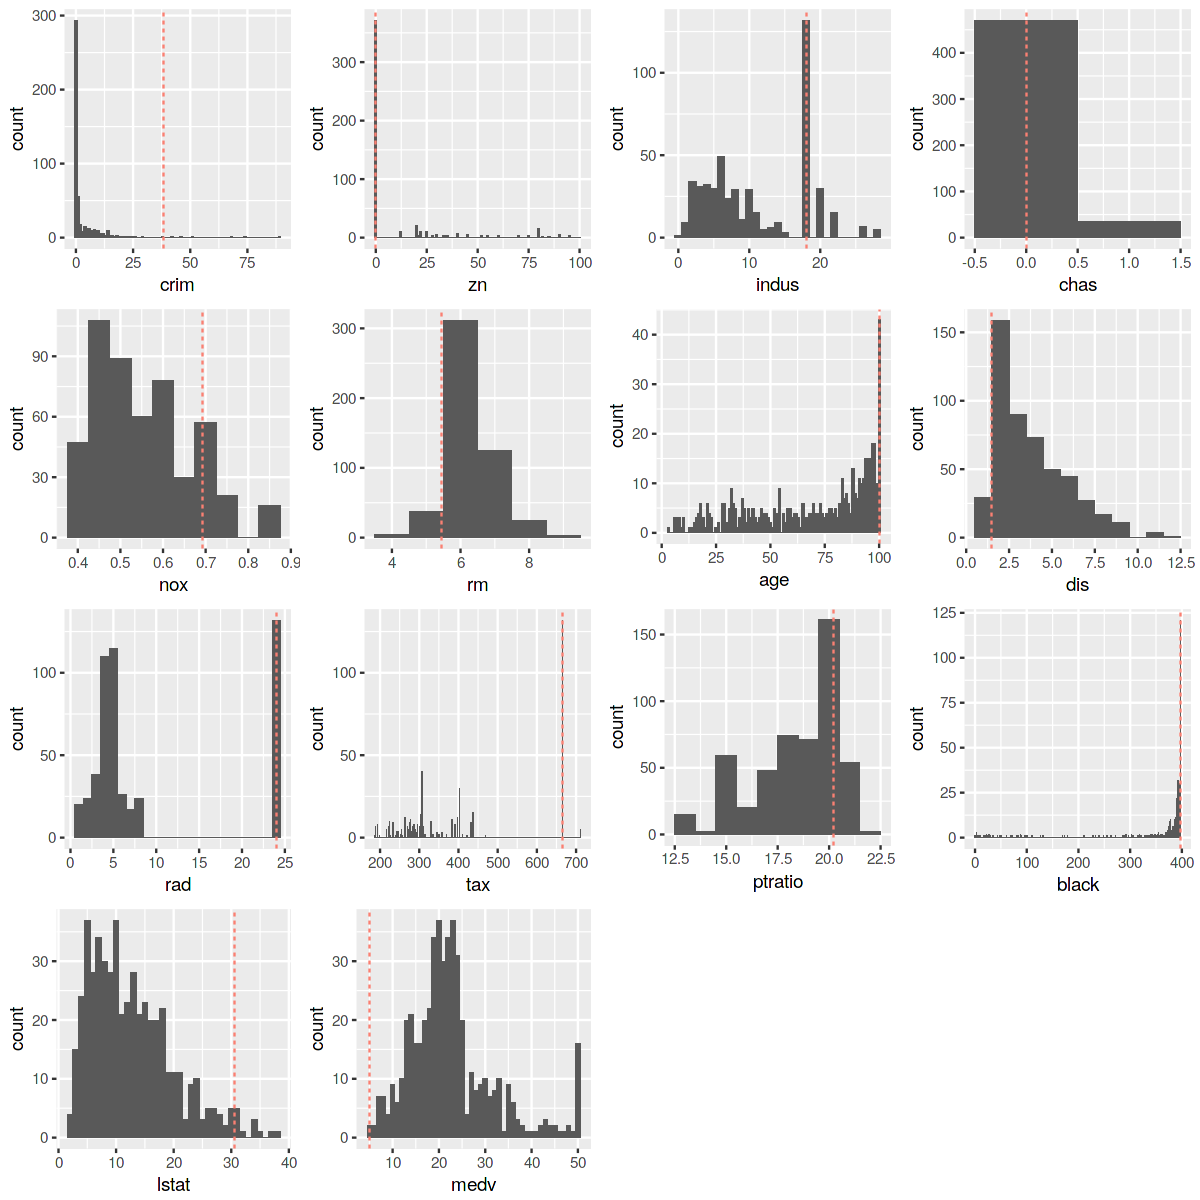

In [41]:
options(repr.plot.width = 10, repr.plot.height = 10)

plots <- list()
for (pred in colnames(Boston)) {
    bin.width <- 1
    if (pred %in% c("nox")) bin.width <- 0.05
    p <- ggplot(Boston, aes_string(x = pred)) + 
        geom_histogram(binwidth = bin.width) +
        geom_vline(xintercept = get(pred, lowest.suburb), 
                   linetype = "dashed", 
                   color = "salmon")
    plots <- c(plots, list(p))
}

do.call("grid.arrange", c(plots, ncol = 4))

This seems to be an old suburb of blacks that is not currently 
residential, with a high crime rate.

The tax rate seems to be placed quite high, but as we saw earlier, a **tax**
can actually be a missing value.

In [42]:
ecdf(Boston$nox)(lowest.suburb$nox)

[1] 0.8577075

Additionally, this could be an industrial area because the **nox** is located at the 86% percentile.

(h) In this data set, how many of the suburbs average more than
seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms
per dwelling.

In [43]:
rooms <- ceiling(Boston$rm)
table(rooms)

rooms
  4   5   6   7   8   9 
  2  14 157 269  51  13 

In [44]:
which(rooms > 7)

[1]   3   5  41  56  65  89  90  98  99 100 162 163 164 167 181 183 187 190 193 196 197 198 199 201 203 204 205 225 226 227 228 229 232 233 234 238 254 257 258 259 261 262 263 264 265 267 268 269 274
[50] 277 281 283 284 285 292 300 305 307 342 365 371 376 454 483

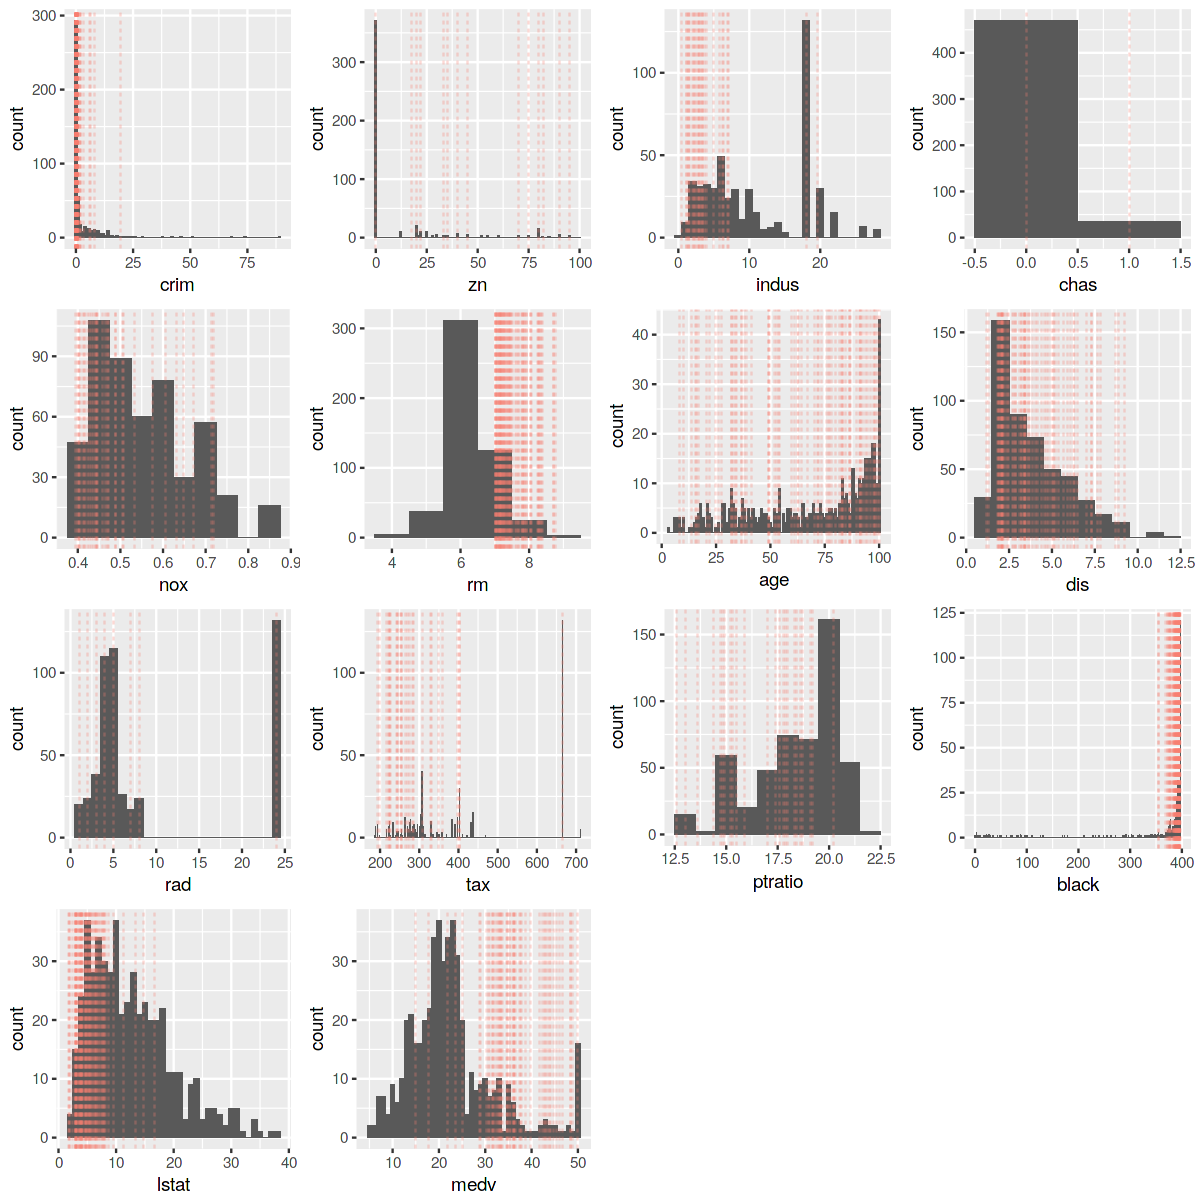

In [45]:
options(repr.plot.width = 10, repr.plot.height = 10)

plots <- list()
for (pred in colnames(Boston)) {
    bin.width <- 1
    if (pred %in% c("nox")) bin.width <- 0.05
    p <- ggplot(Boston, aes_string(x = pred)) + 
        geom_histogram(binwidth = bin.width) +
        geom_vline(xintercept = get(pred, Boston[which(rooms > 7), ]),
                   linetype = "dashed", 
                   color = "salmon",
                   alpha = 0.3)
    plots <- c(plots, list(p))
}

do.call("grid.arrange", c(plots, ncol = 4))

These refer to suburbs with the largest and most expensive houses.

# Chapter 3. Linear Regression

## Lab

In [46]:
library("MASS")
library("ISLR")

### Simple Linear Regression

In [47]:
head(Boston)

crim    zn indus chas nox   rm    age  dis    rad tax ptratio black  lstat medv
1 0.00632 18 2.31  0    0.538 6.575 65.2 4.0900 1   296 15.3    396.90 4.98  24.0
2 0.02731  0 7.07  0    0.469 6.421 78.9 4.9671 2   242 17.8    396.90 9.14  21.6
3 0.02729  0 7.07  0    0.469 7.185 61.1 4.9671 2   242 17.8    392.83 4.03  34.7
4 0.03237  0 2.18  0    0.458 6.998 45.8 6.0622 3   222 18.7    394.63 2.94  33.4
5 0.06905  0 2.18  0    0.458 7.147 54.2 6.0622 3   222 18.7    396.90 5.33  36.2
6 0.02985  0 2.18  0    0.458 6.430 58.7 6.0622 3   222 18.7    394.12 5.21  28.7

Let’s try to predict **medv** using the others as predictors.

In [48]:
lm.fit <- lm(medv ~ lstat, data = Boston)
lm.fit


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [49]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [50]:
coef(lm.fit)

(Intercept)       lstat 
 34.5538409  -0.9500494

Confidence interval of the coefficient estimates.

In [51]:
confint(lm.fit)

2.5 %     97.5 %    
(Intercept) 33.448457 35.6592247
lstat       -1.026148 -0.8739505

In [52]:
display_markdown("#### Confidence Intervals")
predict(lm.fit, data.frame(lstat = c(5, 10, 15)), interval = "confidence")
display_markdown("#### Prediction Intervals")
predict(lm.fit, data.frame(lstat = c(5, 10, 15)), interval = "prediction")

#### Confidence Intervals

fit      lwr      upr     
1 29.80359 29.00741 30.59978
2 25.05335 24.47413 25.63256
3 20.30310 19.73159 20.87461

#### Prediction Intervals

fit      lwr       upr     
1 29.80359 17.565675 42.04151
2 25.05335 12.827626 37.27907
3 20.30310  8.077742 32.52846

To remember, *prediction intervals* are always wider than the 
*confidence intervals*.

Remember we are approximating $y = f(x) + \epsilon$. Thus:

- **Confidence interval**: quantify the uncertainty of the surrounding the 
    *average*.  We interpret it as 95% of the confidence intervals will contain
    the actual $f(X)$.
- **Prediction interval**: even if we knew the actual $f(X)$, how much the
    prediction would vary? This is the prediction error plus the irreducible
    error $\epsilon$. We interpret it as 95% of the prediction intervals will contain 
    $y$.


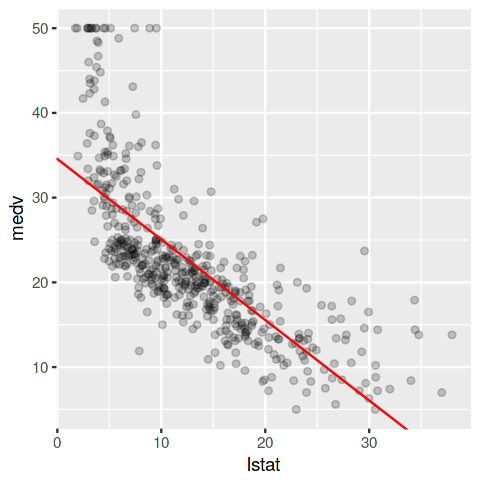

In [53]:
options(repr.plot.width = 4, repr.plot.height = 4)

ggplot(Boston, aes(lstat, medv)) + 
    geom_point(alpha = 0.2) +
    geom_abline(
        intercept = coef(lm.fit)[1],
        slope = coef(lm.fit)[2],
        colour = "red")

This looks somewhat non-linear.

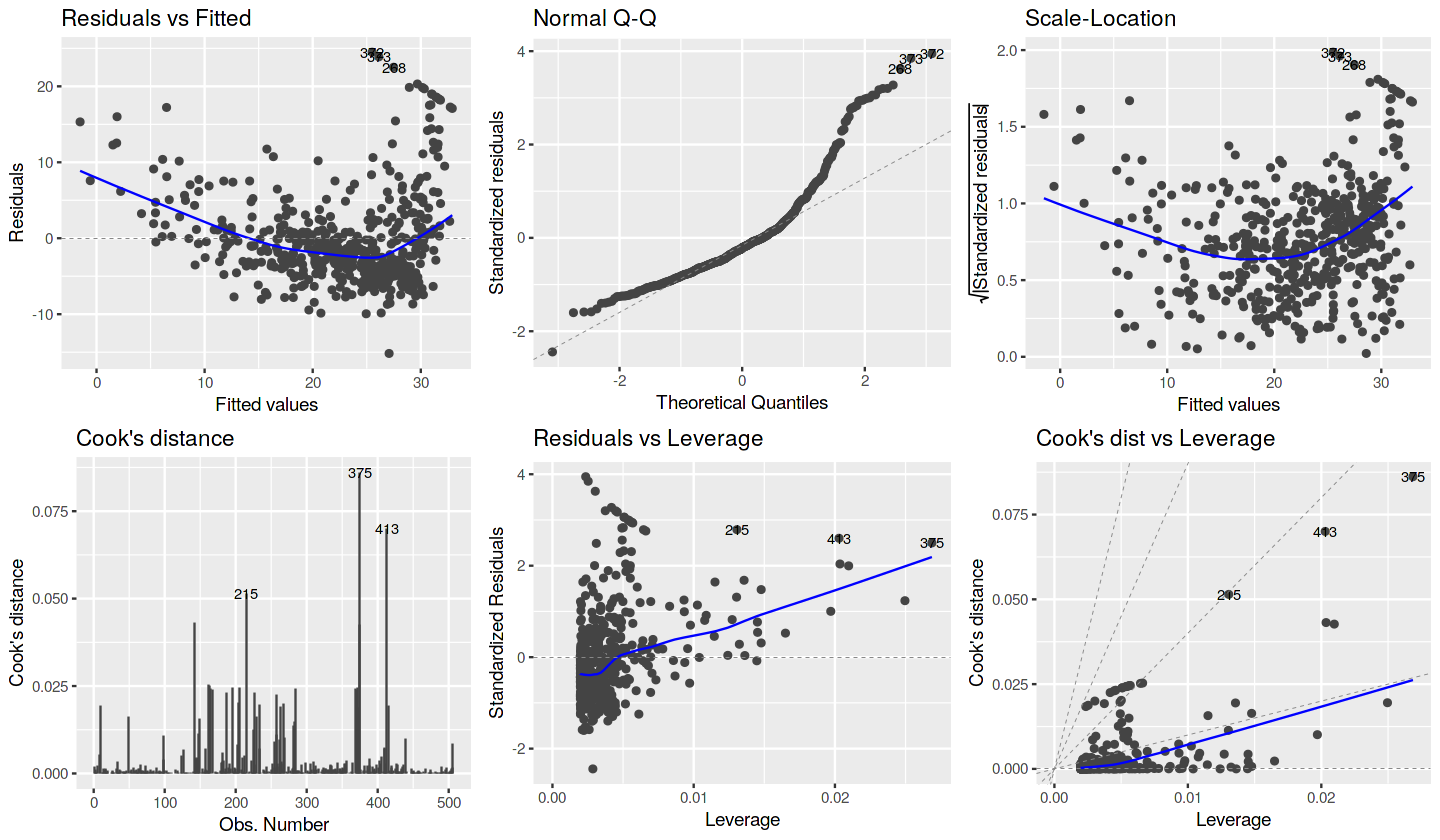

In [54]:
library("ggfortify")

options(repr.plot.width = 12, repr.plot.height = 7)

autoplot(lm.fit, which = 1:6, ncol = 3, label.size = 3)

- **Residuals × Fitted**: Evidence of a non-linear relationship
- **Normal Q–Q**: The Q–Q plot of the residuals shows that they are not normally distributed, otherwise would follow a straight line.
- **Scale–Location**: This plot is useful to check for homoscedasticity. In this case, the residuals show a heterocedasticity spread, because the are concentrated in some values and more spread in others.
- **Residuals × Leverage**: This plot helps find influential observations, which can be outliers. There are not visible outliers in this data.

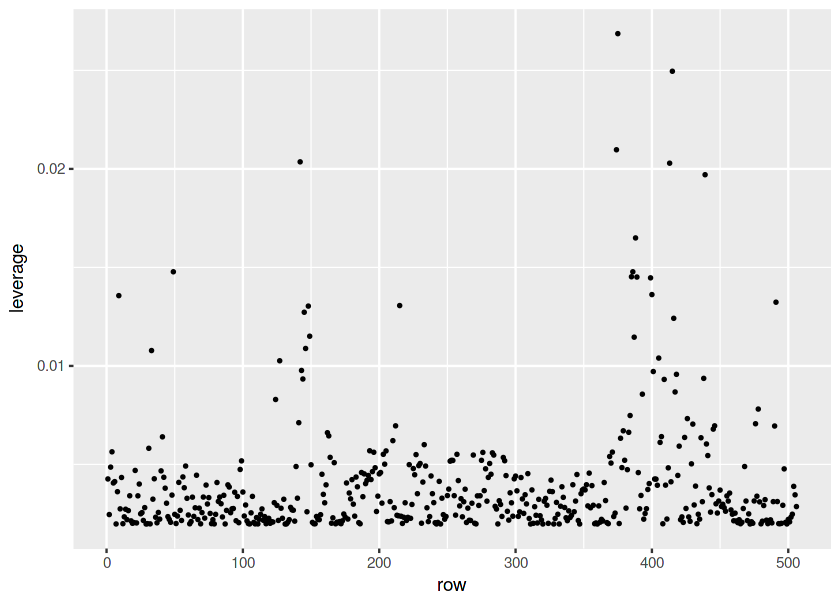

In [55]:
options(repr.plot.width = 7, repr.plot.height = 5)
leverage <- cbind(row=1:nrow(Boston), leverage=hatvalues(lm.fit))
ggplot(leverage, aes(row, leverage)) + geom_point(size = 0.5)

### Multiple Linear Regression

In [56]:
lm.fit <- lm(medv ~ lstat + age, data = Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


In [57]:
lm.fit <- lm(medv ~ ., data = Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

In [58]:
library("car")

vif(lm.fit)

crim       zn    indus     chas      nox       rm      age      dis      rad      tax  ptratio    black    lstat 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 7.484496 9.008554 1.799084 1.348521 2.941491

In [59]:
lm.fit <- lm(medv ~ . - age, data = Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ . - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.999  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1

### Interaction Terms

In [60]:
summary(lm(medv ~ lstat * age, data = Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


### Non-linear Transformations of the Predictors

In [61]:
lm.fit2 <- lm(medv ~ lstat + I(lstat^2), data = Boston)
summary(lm.fit2)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


Hypothesis test. Null hypothesis is that the `lm.fit2` fits the data equally well as `lm.fit`. 
The alternative hypethesis is that the `lm.fit2` is superior.

In [62]:
lm.fit <- lm(medv ~ lstat, data = Boston)
anova(lm.fit, lm.fit2)

Res.Df RSS      Df Sum of Sq F        Pr(>F)      
1 504    19472.38 NA       NA        NA           NA
2 503    15347.24  1 4125.138  135.1998 7.630116e-28

The **F** is 135 with a *p* pratically zero. We reject the null hypothesis.
Thus, the **lstat**² improved a lot the model.

In [63]:
lm.fit5 <- lm(medv ~ poly(lstat, 5), data = Boston)
summary(lm.fit5)


Call:
lm(formula = medv ~ poly(lstat, 5), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


In [64]:
summary(lm(medv ~ log(rm), data = Boston))


Call:
lm(formula = medv ~ log(rm), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.487  -2.875  -0.104   2.837  39.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -76.488      5.028  -15.21   <2e-16 ***
log(rm)       54.055      2.739   19.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.915 on 504 degrees of freedom
Multiple R-squared:  0.4358,	Adjusted R-squared:  0.4347 
F-statistic: 389.3 on 1 and 504 DF,  p-value: < 2.2e-16


### Qualitative Predictors

In [65]:
head(Carseats)

Sales CompPrice Income Advertising Population Price ShelveLoc Age Education Urban US 
1  9.50 138        73    11          276        120   Bad       42  17        Yes   Yes
2 11.22 111        48    16          260         83   Good      65  10        Yes   Yes
3 10.06 113        35    10          269         80   Medium    59  12        Yes   Yes
4  7.40 117       100     4          466         97   Medium    55  14        Yes   Yes
5  4.15 141        64     3          340        128   Bad       38  13        Yes   No 
6 10.81 124       113    13          501         72   Bad       78  16        No    Yes

In [66]:
lm.fit <- lm(Sales ~ . + Income:Advertising + Price:Age, data = Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

To see which dummies `R` has used:

In [67]:
contrasts(Carseats$ShelveLoc)

Good Medium
Bad    0    0     
Good   1    0     
Medium 0    1

Since **ShelveLocGood** in the regression output is positive indicates that a good
shelving location is associated with high sales (relative to a bad location).
And
**ShelveLocMedium**
has a smaller positive coefficient, indicating that a
medium shelving location leads to higher sales than a bad shelving location
but lower sales than a good shelving location.

## Applied